# 重抽样方法 Bootstrap


例子一：估计X的总体均值与总体方差

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Bootstrap.csv')
df.head(3)


,Unnamed: 0,X,Y
0,1,-0.895251,-0.234924
1,2,-1.562454,-0.885176
2,3,-0.417090,0.271888


In [76]:
#普通统计方法估计总体均值和方差
sample_mean = np.mean(df.X)
print("population mean is ",sample_mean )
sample_variance = np.var(df.X)
print("population variance is ",sample_variance/len(df.X ))

population mean is  -0.0771321082109919
population variance is  0.011173559345375695


In [77]:
#Bootstrap估计总体均值和方差
from random import choices
index = np.random.choice(range(100),100)
np.mean(df.X[index])

0.07649145321069327

population mean is  -0.07768850055261536
population variance is  0.011283540923698236


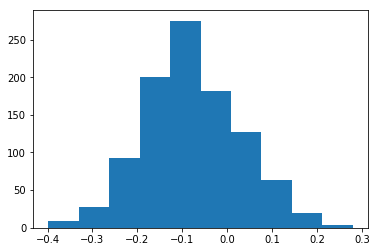

In [78]:
sample_mean_list = []
for i in range(1000):
    index = np.random.choice(range(100),100)
    sample_mean_list.append(np.mean(df.X[index]))
    
print("population mean is ",np.mean(sample_mean_list ))
population_variance = np.var(sample_mean_list)
print("population variance is ",population_variance)

plt.hist(sample_mean_list)
plt.show()

例子二：choose α to minimize the total risk, or variance, of our investment. In other words, we want to minimize Var(αX + (1 − α)Y )

In [84]:
def alpha_hat(data):
    x = data.X
    y = data.Y
    covariance = np.cov(x,x)[0][1]
    var_x =np.var(x)
    var_y =np.var(y)
    return (var_x-covariance)/(var_y+var_x-2*covariance)

The optimal alpha is：  0.022602755724353343
The variance of alpha is  0.16464572932920526


(array([ 1.,  9., 86.,  2.,  0.,  0.,  1.,  0.,  0.,  1.]),
 array([-0.98403512, -0.55258865, -0.12114218,  0.31030429,  0.74175076,
         1.17319723,  1.6046437 ,  2.03609017,  2.46753664,  2.89898311,
         3.33042958]),
 <a list of 10 Patch objects>)

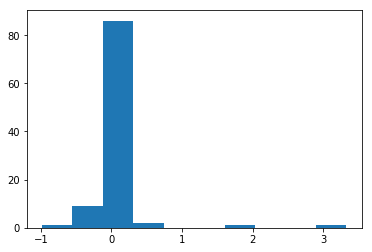

In [101]:
sample_mean_list = []
for i in range(100):
    index = np.random.choice(range(100),100)
    sample_mean_list.append(alpha_hat(df.iloc[index,:]))

print("The optimal alpha is： ",np.mean(sample_mean_list))
print("The variance of alpha is ",np.var(sample_mean_list))
plt.hist(sample_mean_list)

